# Height and Weight statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load the data you receive into a Pandas
### Show the first five rows of the data set.

In [6]:
df = pd.read_csv('./data.csv')
df.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


### Description for the data

In [12]:
df.describe()


,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


### Data information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


### Determine the X and y axes (dependent and independent variables)

In [122]:
X = df['Height'].values
y = df['Weight'].values
X_array=np.array(X)
y_array=np.array(y)

In [124]:
X_array=X_array.reshape(-1,1)
# X

### Using a regression model, split the data into train and test data.

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X_array,y_array,train_size=0.8,test_size=0.2,random_state=100)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(3,)

### Plot the data 

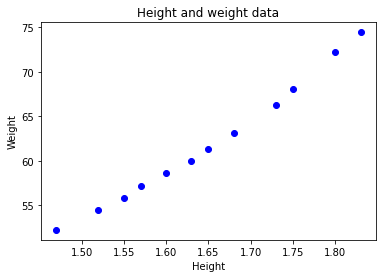

In [126]:
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height and weight data')
plt.show()

### Fit the training split to the regression model.

In [127]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
y_predict = regression_model.predict(x_test)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

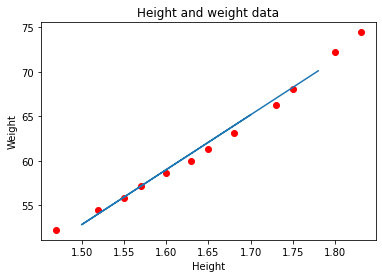

In [128]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height and weight data")
plt.plot

### Show the regression model’s score and accuracy for both training and testing data

In [129]:
print(f"Train accuracy {round(regression_model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(regression_model.score(x_test,y_test)*100,2)} %")

Train accuracy 98.73 %
Test accuracy 99.57 %


## Conclusions
1. the less values we get, the more linear behavior we observe, and that what we could see in the testing regression graph

In [130]:
regression_model = LinearRegression()
regression_model.fit(x_test,y_test)
y_predict = regression_model.predict(x_train)


<function matplotlib.pyplot.show(close=None, block=None)>

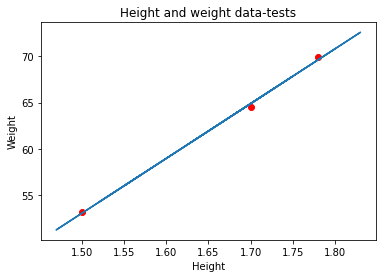

In [132]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,y_predict)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height and weight data-tests")
plt.show

2.  the proportion of the variance (r^2_score) for weight which is explained by the height or other variables in a regression model is pretty high, which means that the weight variations is almost completely explained by the height variations

In [135]:
# sum of square of residuals
ssr = np.sum((y_predict - y_train)**2)

#  total sum of squares
sst = np.sum((y_train - np.mean(y_train))**2)

# R2 score
r2_score = 1 - (ssr/sst)
r2_score


0.9851006008180332

3. the difference between actual and estimated values (mean squared error or MSE) is very law which means that the relation is very close to the perfect linear behavior

In [146]:
MSE=np.square(np.subtract(y_train,y_predict)).mean()
MSE


0.6776402777777738